<a href="https://colab.research.google.com/github/LissethGome3/Progra_III/blob/main/trabajos_computo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Convertir de Celsius de Fahrenheit

In [ ]:
def convertirCF(C):
  C = (C * 9/5) + 32 
  return C

C = float(input("C: "))
print("C: ", str(C), " a Fahrenheit: ", str( convertirCF(C) ))

C: 25
C:  25.0  a Fahrenheit:  77.0


2. Calcular la edad de una persona

In [ ]:
def resta(num1, num2):
  resp = num1 - num2
  return resp
num1 = float(input("Año actual: "))
num2 = float(input("Año de nacimiento: "))
resp = resta(num1,num2)
print("Edad actual: ", resp)

Año actual: 2021
Año de nacimiento: 1973
Edad actual:  48.0


3. Obtener la nota final de ciclo

In [ ]:
num1 = input("Lab1: ")
num2 = input("Lab2: ")
num3 = input("Examen: ")
resp = float(num1) + float(num2) + float(num3)

print(resp)
num4 = input("entre: ")
resp2 = float(resp) / float(num4)
print("El resultado final es: ", resp2)

Lab1: 8
Lab2: 10
Examen: 10
28.0
entre: 3
El resultado final es:  9.333333333333334


1. Convertir de Celsius de Fahrenheit usando lambda


In [ ]:
conversion = lambda C = (C * 9/5) + 32 
C = float(input("Celsius: "))
print("Grados C: ", C, " a F: ", conversion(C))

2. Calcular la edad de una persona usando lambda.

In [ ]:
resta = lambda num1,num2: num1-num2
num1 = float(input("año actual: "))
num2 = float(input("año de nacimiento: "))
print("La edad de alguien del año ", num2, " es: ", resta(num1,num2))

año actual: 2020
año de nacimiento: 1999
La edad de alguien del año  1999.0  es:  21.0


3. Obtener la nota final de ciclo usando lambda



In [ ]:
suma = lambda num1, num2, num3: num1 + num2 + num3
num1 = float(input("Laboratorio 1: "))
num2 = float(input("Laboratorio 2: "))
num3 = float(input("Examen Final: "))
resp1 = num1+num2+num3
print("el resultado de la suma: ", suma(num1,num2,num3), "es: ", resp1)
división = lambda num4: 3
num4 = float(input("dividimos entre "))
resp = (resp1/num4)
print("el resultado es: ", resp)

clcular sobre el sueldo las deducciones de ley isss (3%), afp

In [ ]:
sueldo = float(input("sueldo: "))
isss = sueldo*0.03
afp = sueldo*0.0625
SueldoNeto = sueldo - (isss + afp)

tablaIsr= [
           [0.01, 472.0, 0, 0]
           [472.01, 895.24, ]
]

800.0 deducciones:  824.0625 sueldo neto:  -24.0625


Conversores:
1. monedas
dolar
euro
lempira
cordoba
quetzal
colón
pesos CR

In [ ]:
valores = [
           [],
           [1, 0.85, 23.8, 35.11, 7.64, 8.75, 621.61], #monedas
           [],                                         #longitud
]
etiquetas = [
          [],
          ["1. dolar", "2. euro" "3. lempira", "4. cordobas", "5. quetzal", "6. colón SV", "7. colón CR"],
          [],
]

def convertir(conversor, de, a, cantidad):
  return valores[conversor][a]/valores[conversor][de] * cantidad

print("***MENU***")
print("*1. Monedas*")
print("*2. Longitud*")
print("*3. Masa*")
conversor = int(input("Conversor: "))

print( etiquetas[conversor] )


de = int(input("DE: "))
a = int( input("A: "))
cantidad = float(input("Cant: "))

print("Respuesta: ", convertir(conversor, de, a, cantidad))


***MENU***
*1. Monedas*
*2. Longitud*
*3. Masa*
Conversor: 1
['1. dolar', '2. euro3. lempira', '4. cordobas', '5. quetzal', '6. colón SV', '7. colón CR']
DE: 1
A: 6
Cant: 1
Respuesta:  731.3058823529412


Realizar un conversor propio, donde espesifique el valor de conversión:


In [ ]:
Cajas = int(input("Ingrese la cantidad de Cajas a convertir en unidades: "))
Saco = int(input("Ingrese la cantidad de Saco a convertir en libras: "))
Fardo = int(input("Ingrese la cantidad de Fardo a convertir en unidades: "))
if Cajas<= 1:
  print("25 Unidades")
elif Cajas<= 1.5:
  print("30 Unidades")
  
elif Cajas<2:
  print("50 unidades")
elif Cajas<= 2/5:
  print("55 Unidades")
elif Cajas<3:
  print("75 unidades")
elif Cajas<=3.5:
  print("80 unidades")
else:
  print("Incorrecto")

ENTRENANDO UNA RED NEURONAL PARA QUE APRENDA A LEER NUMEROS DEL 0 - 9



In [34]:
#IMPORAR LAS LIBRERIAS 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import tensorflow_datasets as tfds

In [35]:
#cargamos nuestro dataset en variables
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [36]:

numeros_letras = ["Camiseta", "Pantalón", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Botín"]

In [37]:
#pasar en variables los datos de entrenamiento y prueba
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [38]:
#funcion normalizadora de los pixeles de 0 - 255 que sean de 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # 150/255=0.588
  return images, labels

In [39]:
#llamamoas la funcion normalizadora en ambos dataset
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [40]:
#estruturamos nuestra red neuronal
modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entreda de 28*28 = 784 neuronas una para cada pixel
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 neuronas una para cada numero, 
        #funcion de activacion softmax. esta funcion es requerida para clasificacion
])

In [41]:
#Compilamos el modelo de red neuronal e indicamos las funciones a utilizar 
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [42]:
#Entrenamiento por lotes
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [43]:
#entrenado nuetro modelo de datos
modelo.fit(datos_entrenamiento, epochs=5, 
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5081 - accuracy: 0.8191
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3389 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3195 - accuracy: 0.8823
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3009 - accuracy: 0.8885


In [44]:
#evaluar el modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.3545 - accuracy: 0.8744
Resultado de las pruebas 0.354511022567749 0.8744009733200073


In [46]:

#graficar la salida para evaluar los resultados
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  #plt.xticks([])
  #plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)

4 4


Text(0.5, 0, 'Prediccion: Abrigo')

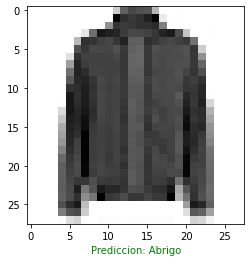

In [49]:
#convertimos los tensores o imagenes en matrices numpy
for imagen_prueba, etiqueta_prueba in datos_prueba.take(1):
  imagen_prueba = imagen_prueba.numpy()
  etiqueta_prueba = etiqueta_prueba.numpy()
  predicciones = modelo.predict(imagen_prueba)

i = 0
for miImagen, etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  imagen = miImagen[i].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(imagen, batch_size=1)

valor_predicho = np.argmax(prediccion)  
print( valor_predicho, etiqueta[i] ) 

index = 0
img = imagen #imagen_prueba[index]
plt.grid(False)
plt.imshow(img[0,...,0], cmap=plt.cm.binary)
#label = etiqueta_prueba[index]
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_predicho]), color="green")

In [48]:
#Graficamos los valores de las matriz una para las imagenes y otra para las graficas de barra segun el acierto
def graficar_valores_matriz(i, matriz_prediccion, etiqueta_verdadera):
  matriz_prediccion, etiqueta_verdadera = matriz_prediccion[i], etiqueta_verdadera[i]
  plt.grid(False)
  #plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(10), matriz_prediccion, color="#888888")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(matriz_prediccion)

  thisplot[etiqueta_prediccion].set_color("red")
  thisplot[etiqueta_verdadera].set_color("green")

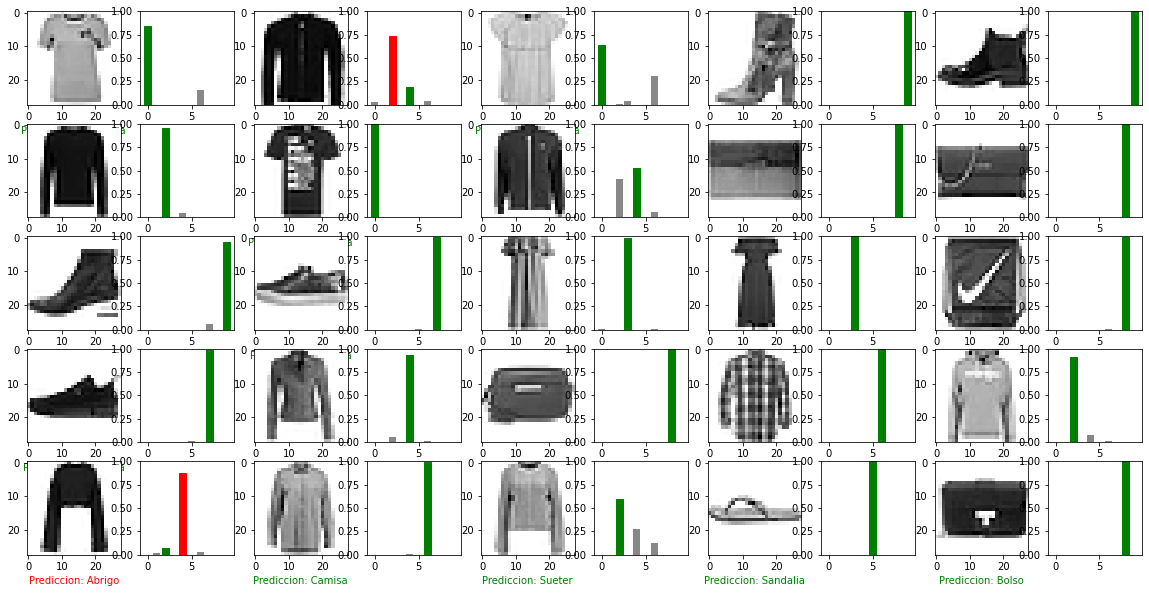

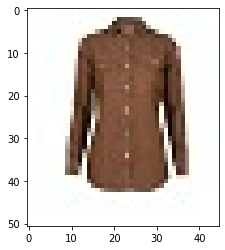

In [54]:
#recorrer las imagenes a graficar
numfilas = 5
numcols = 5
numimgs = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimgs):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiqueta_prueba, imagen_prueba)

  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matriz(i, predicciones, etiqueta_prueba)
  

plt.show()


imagen = cv2.imread("/content/image (8).jpg")
plt.imshow(imagen)
plt.show()
